In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
products = {
    "Product Name": ["sciworm", "oxonium", "mRNA display app", "OpenPKai", "Cell Line Atlas", "siPHONN", "Cohort Browser", "sciworm", "TDeasy", "DRUGSeq"],
    "Area": ["Stem Cell", "GDD", "GRT", "GDD/AIDR", "GDD/GRT", "GDD", "GT", "CT", "GDD", "GDD"],
    "Area": ["Stem Cell", "Drug Discovery", "Research Technologies", "Drug Discovery/Machine Learning", "Drug Discovery/Research Technologies", "Drug Discovery", "Translation", "Stem Cell", "Drug Discovery", "Drug Discovery"],
    "Type": ["Data Registration", "Data Registration", "Data Registration", "Data Product", "Data Registration", "Data Registration", "Data Registration", "Data Registration", "Data Registration", "Data Registration"],
    "Fields": [17, 14, 29, 82, 12, 28, 73, None, 42, 57],
    "Value": [83, 122, None, 15, 84, 180, 159, 7, 36, 34],
    "Year": [2023, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024, 2024]
}
products_df = pd.DataFrame(products)
products_df

,Product Name,Area,Type,Fields,Value,Year
0,sciworm,Stem Cell,Data Registration,17.0,83.0,2023
1,oxonium,Drug Discovery,Data Registration,14.0,122.0,2023
2,mRNA display app,Research Technologies,Data Registration,29.0,NaN,2023
3,OpenPKai,Drug Discovery/Machine Learning,Data Product,82.0,15.0,2023
4,Cell Line Atlas,Drug Discovery/Research Technologies,Data Registration,12.0,84.0,2023
5,siPHONN,Drug Discovery,Data Registration,28.0,180.0,2024
6,Cohort Browser,Translation,Data Registration,73.0,159.0,2024
7,sciworm,Stem Cell,Data Registration,NaN,7.0,2024
8,TDeasy,Drug Discovery,Data Registration,42.0,36.0,2024
9,DRUGSeq,Drug Discovery,Data Registration,57.0,34.0,2024


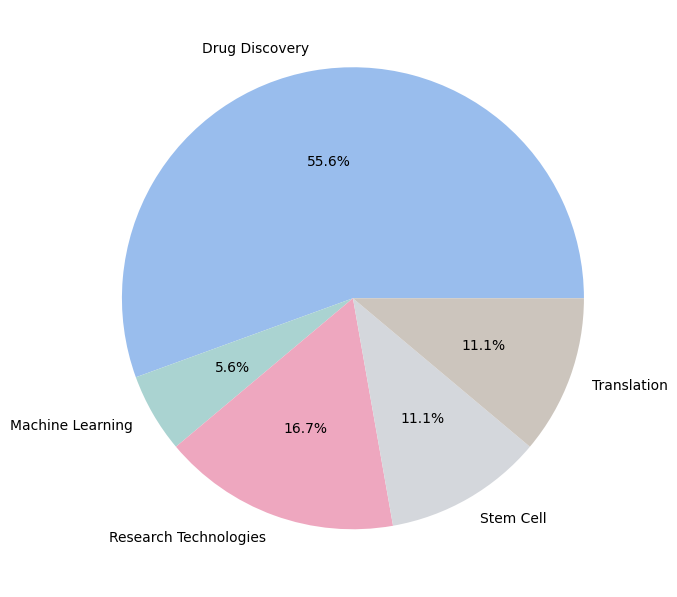

In [12]:
# Pie chart of area distribution

df = pd.DataFrame(products)
area = df.drop_duplicates(subset=['Product Name', 'Area'])[['Product Name', 'Area']]    
area = area.assign(Area=area['Area'].str.split('/')).explode('Area')
area['weightage'] = 1/area.groupby('Product Name')['Area'].transform('count')
colors = ['#99BDED','#AAD3D1','#EEA7BF','#D4D7DC', '#CCC5BD']
area.groupby('Area').sum().plot.pie(y='weightage', autopct='%1.1f%%', colors = colors)
plt.legend().remove()
plt.ylabel('')
plt.gcf().set_size_inches(7.5, 7.5)
plt.show()


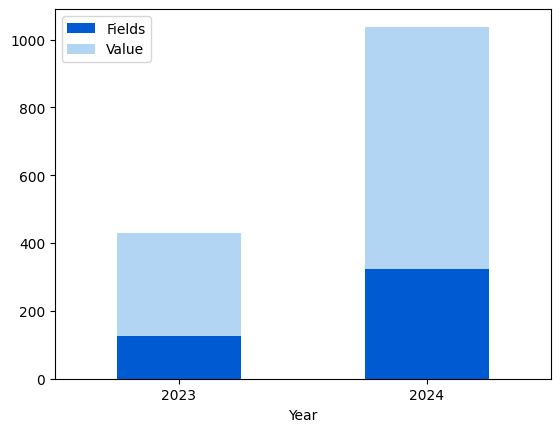

In [4]:
# plot number of fields and values by year in a cumulative way
df2 = df.dropna(subset=['Fields', 'Value'])
df2 = df2.groupby('Year').sum().cumsum()
df2.plot(kind='bar', stacked=True, color = ['#005AD2', '#B1D5F2'])
#make the plot look better
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.show()

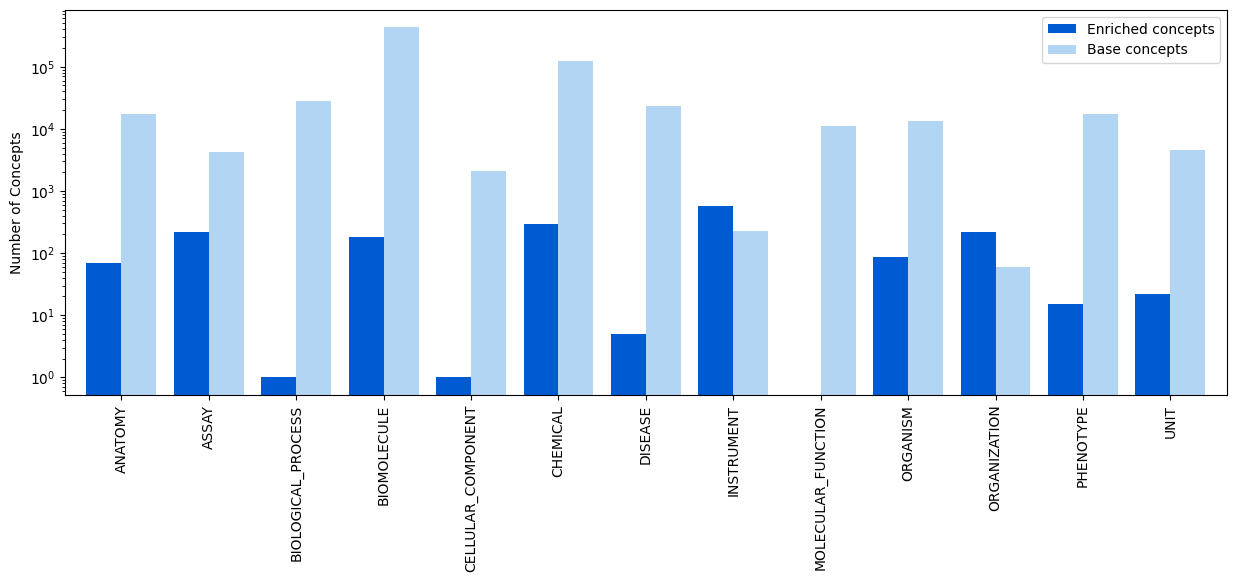

In [5]:
base_concepts = pd.read_csv('data/base.csv')
enriched_concepts = pd.read_csv('data/enrichment.csv')
base_concepts['modelID'] = base_concepts['modelID'].str.split('_base').str[0] 
concepts = pd.merge(base_concepts, enriched_concepts, on='modelID', how='outer')
concepts = concepts[['modelID', 'enriched', 'concepts']]
concepts = concepts.rename(columns={'concepts': 'Base concepts'})
concepts = concepts.rename(columns={'enriched': 'Enriched concepts'})
concepts = concepts.fillna(0)
concepts = concepts[concepts['modelID'] != 'NN_CONCEPT']

#plot a bar chart with enriched and concepts side by side
concepts = concepts.groupby('modelID').sum()
fig, ax = plt.subplots(figsize=(15, 5))
concepts.plot(kind='bar', color = ['#005AD2', '#B1D5F2'], width=0.8, ax=ax)
plt.xlabel('')
plt.ylabel('Number of Concepts')
plt.yscale('log')
plt.show()

